# Projektaufgabe: Diskriptive Statistik und Visualisierung

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

df = pd.read_csv('../data/Library_Usage.csv')

### Wie viele NutzerInnen möchten per E-Mail benachrichtigt werden? Welche Altersgruppe ist bei der E-Mail Benachrichtugung am häufigsten vertreten?

In [2]:
df.columns

Index(['Patron Type Code', 'Patron Type Definition', 'Total Checkouts',
       'Total Renewals', 'Age Range', 'Home Library Code',
       'Home Library Definition', 'Circulation Active Month',
       'Circulation Active Year', 'Notice Preference Code',
       'Notice Preference Definition', 'Provided Email Address',
       'Year Patron Registered', 'Within San Francisco County'],
      dtype='object')

In [3]:
email = df.loc[
    (df['Notice Preference Definition'] == 'Email')]
email

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
0,1,Juvenile,0,0,0 to 9 years,r3,Richmond,NaN,NaN,z,Email,True,2022,True
1,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2022,True
2,0,Adult,0,0,35 to 44 years,m4,Merced,NaN,NaN,z,Email,True,2019,True
3,2,Teen,0,0,10 to 19 years,x,Main,NaN,NaN,z,Email,True,2021,True
4,2,Teen,0,0,10 to 19 years,b2,Bayview,NaN,NaN,z,Email,True,2013,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437109,3,Senior,3,0,65 to 74 years,a5,Anza,August,2004.0,z,Email,True,2003,True
437110,0,Adult,14,11,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,False
437111,0,Adult,2,0,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,True
437113,3,Senior,4,0,65 to 74 years,m6,Mission,August,2004.0,z,Email,True,2004,True


In [4]:
email['Age Range'].value_counts()

25 to 34 years       88098
35 to 44 years       76322
10 to 19 years       55109
45 to 54 years       45360
0 to 9 years         29979
65 to 74 years       26988
20 to 24 years       21740
55 to 59 years       17403
60 to 64 years       15438
75 years and over    14340
Name: Age Range, dtype: int64

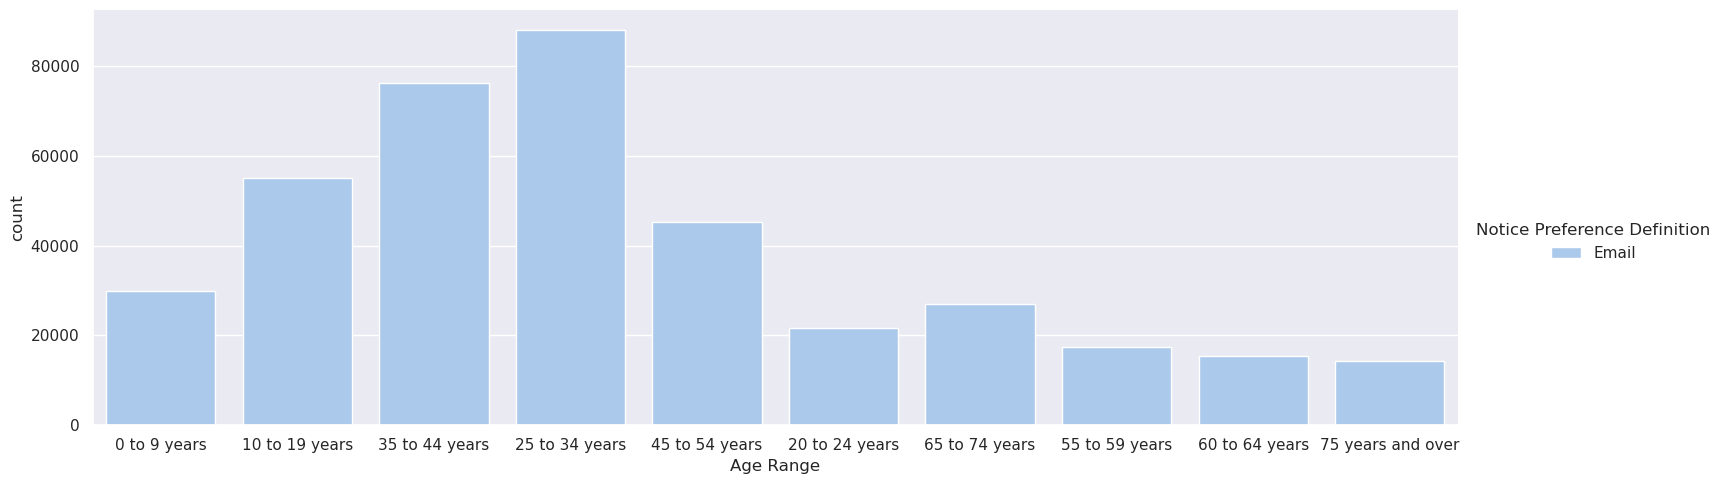

In [5]:
sns.catplot(x='Age Range', kind='count', hue='Notice Preference Definition',
data = email, aspect=3, palette='pastel')

#### 391.614 NutzerInnen möchten per E-Mail benachrichtigt werden. Die am meisten vertretene Altersgruppe sind die 25 bis 34 jährigen mit insgesamt 88.098 NutzerInnen.

### Welche Altersgruppe tätigt die meisten Ausleihen?

In [6]:
df['Total Checkouts'].max()

45380

In [7]:
df['Total Checkouts'].min()

0

In [8]:
df['Total Checkouts'].sum()

70412694

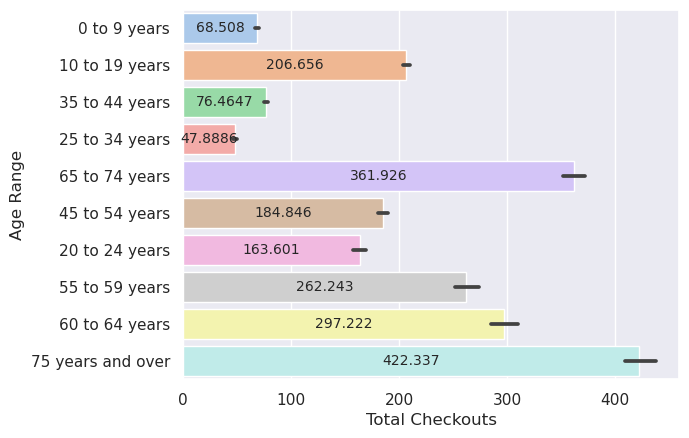

In [12]:
checkouts_age = sns.barplot(data=df, y='Age Range', x='Total Checkouts', palette='pastel')
index = checkouts_age.bar_label(checkouts_age.containers[0], size = 10, label_type='center')

#### Es wurden insgesant 0 - 45380 Ausleihen getätigt. In Summe 70412694 Ausleihen. Die Altersgruppe 75 und älter leiht am häufigsten aus (422.337) gefolgt von der Altersgruppe 65 - 74 Jahre (361.926). Die wenigsten Ausleihen hat die Altersgruppe der 25 - 34 jährigen(47.8886)

### Welcher Monat ist der am besten Genutzte?

In [17]:
df['Circulation Active Month']

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
           ...  
437110    August
437111    August
437112    August
437113    August
437114    August
Name: Circulation Active Month, Length: 437115, dtype: object

In [20]:
monat = df.loc[df['Circulation Active Month'].isnull() == False]
monat

,Patron Type Code,Patron Type Definition,Total Checkouts,Total Renewals,Age Range,Home Library Code,Home Library Definition,Circulation Active Month,Circulation Active Year,Notice Preference Code,Notice Preference Definition,Provided Email Address,Year Patron Registered,Within San Francisco County
40592,0,Adult,0,0,25 to 34 years,m8,Mission Bay,January,2023.0,z,Email,True,2017,True
40593,0,Adult,6,0,35 to 44 years,x,Main,January,2023.0,z,Email,True,2017,False
40594,1,Juvenile,2236,2295,10 to 19 years,o7,Ortega,January,2023.0,z,Email,True,2011,True
40595,0,Adult,49,13,60 to 64 years,r3,Richmond,January,2023.0,z,Email,True,2011,True
40596,2,Teen,1407,1091,10 to 19 years,o2,Ocean View,January,2023.0,z,Email,True,2012,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437110,0,Adult,14,11,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,False
437111,0,Adult,2,0,45 to 54 years,x,Main,August,2004.0,z,Email,True,2003,True
437112,3,Senior,5,0,75 years and over,e7,Eureka Valley,August,2004.0,p,Phone,False,2003,True
437113,3,Senior,4,0,65 to 74 years,m6,Mission,August,2004.0,z,Email,True,2004,True


In [22]:
monat['Circulation Active Month'].value_counts()

January      147097
December      39455
November      29926
October       25451
June          24082
September     23282
August        21810
March         19857
July          16617
May           16479
February      16476
April         15991
Name: Circulation Active Month, dtype: int64

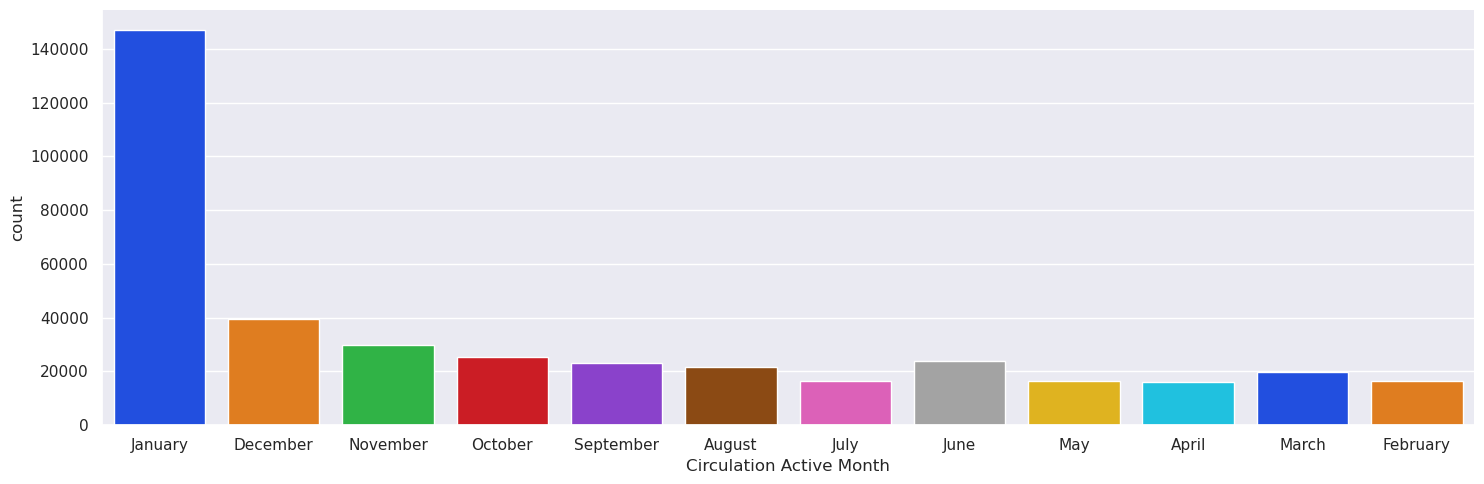

In [31]:
sns.catplot(x='Circulation Active Month', kind='count',
data = monat, aspect=3, palette='bright')

#### Der best genutzte Monat ist Januar mit einer Anzahl von 147097. Der April wird mit einer Anzahl von 15991 am schlechtesten genutzt.